# Real Estate Price Analisys


In our possesion are real estate ads from St. Petersburg and neighborhoods for few years. In this project we are going to analyze building markets and find out an average price. It'll help to detect anomalies and scams.  

## Data Exploration

In [1]:
#libraries importing and data loading
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.describe()
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Misssing values in living and kitchen area columns 

In [2]:
data['living_area'].isnull().sum() / len(data)


0.08029874678256467

In [3]:
data.query('rooms != 0 and studio == True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2389,5,2250000.0,25.41,2016-06-07T00:00:00,1,NaN,12.0,17.08,8,False,...,NaN,2.0,Санкт-Петербург,14125.0,12921.0,2.0,328.0,2.0,485.0,26.0
3187,13,3800000.0,27.00,2016-05-17T00:00:00,1,NaN,14.0,18.00,8,False,...,NaN,2.0,Санкт-Петербург,50348.0,16053.0,0.0,NaN,0.0,NaN,45.0
4180,4,4500000.0,34.00,2016-04-25T00:00:00,1,2.8,10.0,21.00,10,False,...,NaN,2.0,Санкт-Петербург,23609.0,5299.0,0.0,NaN,1.0,433.0,62.0
8683,10,3500000.0,32.50,2016-05-05T00:00:00,1,3.0,23.0,29.90,11,False,...,NaN,2.0,Санкт-Петербург,34967.0,14640.0,0.0,NaN,1.0,564.0,45.0
11026,1,2800000.0,28.00,2016-05-04T00:00:00,1,NaN,26.0,19.00,6,False,...,NaN,2.0,посёлок Парголово,53511.0,19687.0,0.0,NaN,0.0,NaN,45.0
12935,10,2200000.0,31.00,2016-05-15T00:00:00,1,2.5,8.0,22.30,5,False,...,NaN,1.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,44.0
15142,2,2700000.0,30.00,2016-05-10T00:00:00,1,NaN,21.0,26.00,6,False,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,55.0
18732,4,2400000.0,22.00,2016-05-06T00:00:00,1,NaN,10.0,15.00,6,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
20086,0,1550000.0,22.00,2016-05-11T00:00:00,1,2.7,15.0,10.94,14,False,...,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,45.0
21702,9,2349000.0,23.40,2016-05-19T00:00:00,1,2.7,20.0,16.00,8,False,...,NaN,1.0,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,34.0


Studio flats with 1 room - probably 1 room flats after rebuilding

In [4]:
#missing and inadequate values in ceiling height column. We can fill it cause we don't know what building types are
data.query('ceiling_height > 5')['ceiling_height'].value_counts() 


27.0     8
25.0     7
8.0      3
32.0     2
5.3      2
20.0     1
24.0     1
26.0     1
5.5      1
14.0     1
22.6     1
5.8      1
27.5     1
100.0    1
10.3     1
5.6      1
8.3      1
5.2      1
6.0      1
Name: ceiling_height, dtype: int64

In [5]:
#check duplicates
print('Full duplicates', data.duplicated().sum())
print('Particial duplicates', data.duplicated(subset=['last_price', 'total_area', 'rooms', 'floor', 'locality_name']).sum())


Full duplicates 0
Particial duplicates 452


In [6]:
#inadequacy area data
data['diff'] = data['total_area'] - data['living_area'] - data['kitchen_area'] 

In [7]:
#St.Petersburg share
print('Share of flates from St.Petersburg', len(data[data['locality_name'] == 'Санкт-Петербург']) / len(data))

#St.Petersburg's missing values
(
data[data['locality_name'] == 'Санкт-Петербург'][[
    'airports_nearest', 'ceiling_height', 'cityCenters_nearest', 
    'parks_around3000', 'ponds_nearest', 'floors_total', 'days_exposition']].isnull().mean() 
)


Share of flates from St.Petersburg 0.6633613232625849


airports_nearest       0.005407
ceiling_height         0.357293
cityCenters_nearest    0.003880
parks_around3000       0.003880
ponds_nearest          0.492208
floors_total           0.004453
days_exposition        0.132498
dtype: float64

### Conclusion

After data exploration we've found following:

- Misssing values in living and kitchen area columns

- inadequacy area data (total area is less than living area + kitchen area)

- missing and inadequate values in ceiling height

- missing values in floors_total columns

- missing values in balcony column. Probably, there are no balconies

- missing values in location data - locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest. Probably they apperared when geolocation function of phones were off. It worth to mention that 2/3 of ads are from St. Petersburg. But missing values in there are distinctly lesser (for example in airports_nearest, cityCenters_nearest, parks_around3000, floors_total - less than 1 percent). Perhaps, cause of very competitive market in St. Petersburg. We don't know locations of building. So we can fill missing values.

- missing values in days_exposition column. Can't fill it cause the date of deal closing is unknown. 

- columns last_price, floors_total, is_apartment, balcony, airports_nearest, cityCenters_nearest, parks_around3000, ponds_nearest, days_exposition better convert to integer

- column name cityCenters_nearest contein capital letter - convert it to lower case

- particial duplicates

## Data Preprocessing

In [8]:
#fill missingvalues in area data
data['kitchen_area'] = data['kitchen_area'].fillna(
    data['total_area'] * data.groupby('rooms')['kitchen_area'].transform('median') / data.groupby('rooms')['total_area'].transform('median')
) 

#set 0 for studio flats
data['kitchen_area'] = data['kitchen_area'].fillna(0) 


In [9]:
#the same for living area
data['living_area'] = data['living_area'].fillna(
    data['total_area'] * data.groupby('rooms')['living_area'].transform('median') / data.groupby('rooms')['total_area'].transform('median')
) 


In [10]:
#drop inadequacy data
data = data.drop(data.query('total_area < (living_area + kitchen_area)').index)
data = data.drop('diff', axis=1)


In [11]:
data = data.drop(data.query('ceiling_height > 6').index)


In [12]:
#drop missing values
data = data.dropna(subset=['locality_name'])


In [13]:
#fix locality names
data['locality_name'] = data['locality_name'].replace(['Мурино', 'поселок Мурино'], 'посёлок Мурино') 
data['locality_name'] = data['locality_name'].replace('поселок городского типа Красный Бор', 'посёлок городского типа Красный Бор')
data['locality_name'] = data['locality_name'].replace('городской посёлок Павлово', 'посёлок городского типа Павлово')
data['locality_name'] = data['locality_name'].replace('поселок городского типа имени Свердлова', 'посёлок городского типа имени Свердлова')
data['locality_name'] = data['locality_name'].replace('поселок Тельмана', 'посёлок Тельмана')
data['locality_name'] = data['locality_name'].replace('городской поселок Янино-1', 'городской посёлок Янино-1')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Лебяжье', 'посёлок городского типа Лебяжье')
data['locality_name'] = data['locality_name'].replace('поселок Поляны', 'посёлок Поляны')
data['locality_name'] = data['locality_name'].replace('поселок Лесное', 'коттеджный посёлок Лесное')



In [14]:
#fill missing values
data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(0)



In [15]:
#convert to more appropriate data type
data[['last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_nearest']] = data[['last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_nearest']].astype(int, errors='ignore')    
data['is_apartment'] = data['is_apartment'].astype(bool)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'] = data['first_day_exposition'].dt.round('1d')


In [16]:
#to lower case
data = data.rename(columns={'cityCenters_nearest': 'citycenters_nearest'})


In [17]:
#drop duplicates
data = data.drop_duplicates(subset=['last_price', 'total_area', 'rooms', 'floor', 'locality_name']) 



# Conclusion

In this part we fixed some flows in dataset  

## Data Calculations

In [18]:
#price of one square meter
data['price_per_meter'] = data['last_price'] / data['total_area']

#day of week, month and year of publication
data['exposition_day'] = data['first_day_exposition'].dt.weekday
data['exposition_month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['exposition_year'] = pd.DatetimeIndex(data['first_day_exposition']).year

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,exposition_day,exposition_month,exposition_year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.600000,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.300000,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,98.013699,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018


In [19]:
#добавим этаж квартиры; варианты — первый, последний, другой. Для этого напишем функцию, которая
#возвращает 0, если этаж первый, 1, если этаж последний, 2, если другой
#floor (0 if it's first, 1 - last, 2 - else )
def first_last_floor(row):
    floor = row['floor']
    total_floor = row['floors_total']
    if floor == 1:
        return 0
    elif floor == total_floor:
        return 1
    else:
        return 2


data['first_last_floor'] = data.apply(first_last_floor,axis=1)

#relations of living and kitchen areas to total
data['living_by_total'] = data['living_area'] / data['total_area']
data['kitchen_by_living'] = data['kitchen_area'] / data['total_area']



## Data Analisys

In [20]:
#explore the most important parameters
data_basic = data[['total_area', 'last_price', 'rooms', 'ceiling_height']]
data_basic.describe()


,total_area,last_price,rooms,ceiling_height
count,23058.000000,2.305800e+04,23058.000000,14128.000000
mean,60.669078,6.574702e+06,2.078758,2.727924
std,35.902773,1.096799e+07,1.082993,0.279588
min,13.000000,1.219000e+04,0.000000,1.200000
25%,40.000000,3.420000e+06,1.000000,2.520000
50%,52.200000,4.650000e+06,2.000000,2.650000
75%,70.000000,6.800000e+06,3.000000,2.800000
max,900.000000,7.630000e+08,19.000000,6.000000


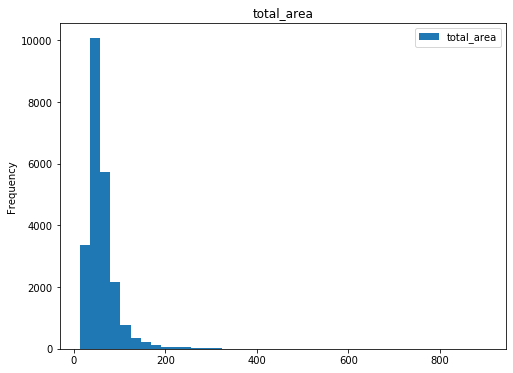

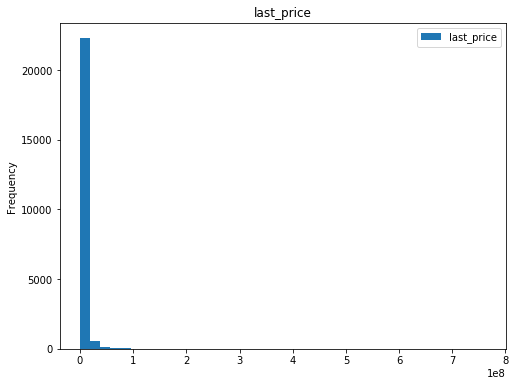

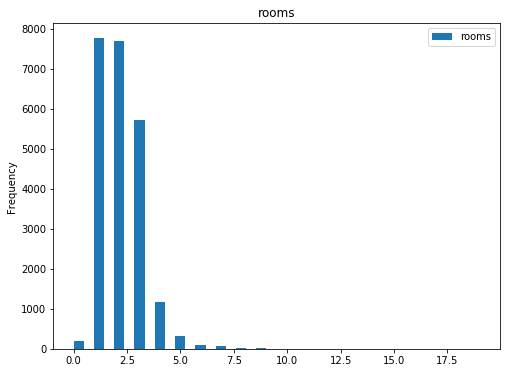

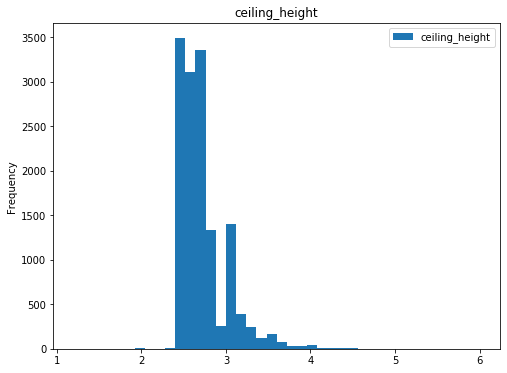

In [21]:
#ploot histograms
for values in data_basic:
    data_basic.plot(y=values, kind='hist', title=values, bins=40, figsize=(8, 6)) 
    plt.show()

count    18233.000000
mean       127.144957
std        119.096599
min          1.000000
25%         41.000000
50%         85.000000
75%        181.000000
max        499.000000
Name: days_exposition, dtype: float64

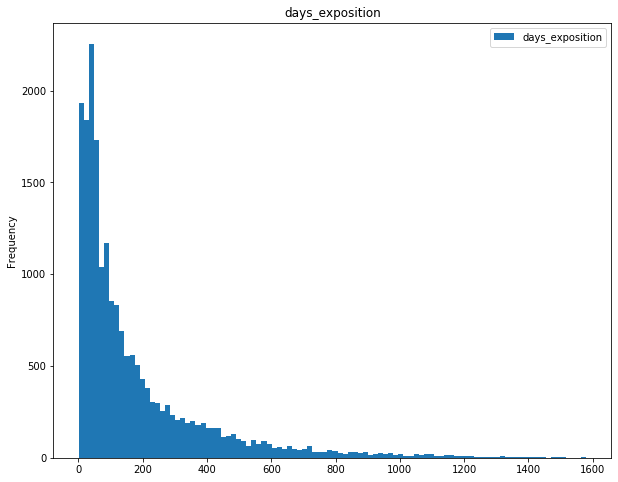

In [22]:
#plot exposition days distribution
data.plot(y='days_exposition', kind='hist', title='days_exposition', bins=100, figsize=(10, 8))
data['days_exposition'].describe()

#look ay the 16 months interval
data.query('days_exposition < 500')['days_exposition'].describe()

In [23]:
#drop outliers
data = data.drop(data.query('ceiling_height < 2').index)
data = data.drop(data.query('last_price < 100000').index)

data = data.drop(data.query('total_area > 250').index)
data = data.drop(data.query('last_price > 40000000').index)
data = data.drop(data.query('rooms > 10').index)

# Conclusion

The half of flats sells in 3 months. Avarage selling duration is 6 month. Mean value is 3 times greater than median cause of being on market too long - more than 16 month. The most longest exposition - 4.5 years. 

In [24]:
#check correlations
data.corr()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,exposition_day,exposition_month,exposition_year,first_last_floor,living_by_total,kitchen_by_living
total_images,1.000000,0.154181,0.116990,0.095058,0.032304,0.013390,0.099661,0.031830,0.012287,-0.029316,...,-0.019976,0.002648,-0.031267,0.140098,-0.008775,0.005041,0.144457,0.039170,0.010414,-0.017697
last_price,0.154181,1.000000,0.784258,0.500895,0.508668,0.055045,0.686505,0.065450,0.023952,-0.050349,...,0.198020,-0.111387,0.128514,0.695744,-0.011595,0.004410,-0.039639,0.113998,0.034239,-0.114246
total_area,0.116990,0.784258,1.000000,0.795649,0.468355,-0.061562,0.937004,-0.027304,0.016915,-0.089824,...,0.151167,-0.079480,0.158804,0.183290,-0.011263,0.005954,-0.082525,0.026577,0.210676,-0.338344
rooms,0.095058,0.500895,0.795649,1.000000,0.256926,-0.228302,0.868977,-0.158031,-0.004094,-0.157096,...,0.076638,-0.043198,0.120761,-0.038904,-0.004790,-0.005267,-0.050722,-0.058355,0.538272,-0.560046
ceiling_height,0.032304,0.508668,0.468355,0.256926,1.000000,-0.086572,0.420162,-0.045637,0.055764,0.021276,...,0.231712,-0.137350,0.115547,0.355142,-0.019152,0.002278,-0.098220,0.010624,-0.017804,0.005364
floors_total,0.013390,0.055045,-0.061562,-0.228302,-0.086572,1.000000,-0.165193,0.678295,-0.021620,0.069176,...,-0.119851,0.037516,-0.051874,0.231178,0.012133,0.018027,0.005920,0.314789,-0.368369,0.314589
living_area,0.099661,0.686505,0.937004,0.868977,0.420162,-0.165193,1.000000,-0.105149,0.012585,-0.064678,...,0.132322,-0.065642,0.146596,0.095906,-0.009594,0.000721,-0.071615,-0.015150,0.500862,-0.513299
floor,0.031830,0.065450,-0.027304,-0.158031,-0.045637,0.678295,-0.105149,1.000000,-0.010400,0.036590,...,-0.077104,0.025775,-0.040957,0.181861,0.011461,0.019379,0.004600,0.302915,-0.266269,0.223019
is_apartment,0.012287,0.023952,0.016915,-0.004094,0.055764,-0.021620,0.012585,-0.010400,1.000000,-0.003331,...,0.016827,0.003881,0.007001,0.025893,-0.007837,-0.003236,0.015720,-0.001462,-0.008453,0.012985
studio,-0.029316,-0.050349,-0.089824,-0.157096,0.021276,0.069176,-0.064678,0.036590,-0.003331,1.000000,...,0.001410,0.001572,-0.021997,0.026175,-0.000536,0.001404,0.013070,0.015534,0.093184,-0.190587


In [25]:
(
data[['last_price', 'total_area', 'rooms', 'first_last_floor', 'citycenters_nearest', 'exposition_day',
      'exposition_month', 'exposition_year']].corr()
)


,last_price,total_area,rooms,first_last_floor,citycenters_nearest,exposition_day,exposition_month,exposition_year
last_price,1.000000,0.784258,0.500895,0.113998,-0.345121,-0.011595,0.004410,-0.039639
total_area,0.784258,1.000000,0.795649,0.026577,-0.236472,-0.011263,0.005954,-0.082525
rooms,0.500895,0.795649,1.000000,-0.058355,-0.171718,-0.004790,-0.005267,-0.050722
first_last_floor,0.113998,0.026577,-0.058355,1.000000,-0.066832,0.001088,0.010915,0.017247
citycenters_nearest,-0.345121,-0.236472,-0.171718,-0.066832,1.000000,0.010653,-0.009503,0.024736
exposition_day,-0.011595,-0.011263,-0.004790,0.001088,0.010653,1.000000,0.011630,-0.004038
exposition_month,0.004410,0.005954,-0.005267,0.010915,-0.009503,0.011630,1.000000,-0.271437
exposition_year,-0.039639,-0.082525,-0.050722,0.017247,0.024736,-0.004038,-0.271437,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f49922d8ed0>,
      dtype=object)

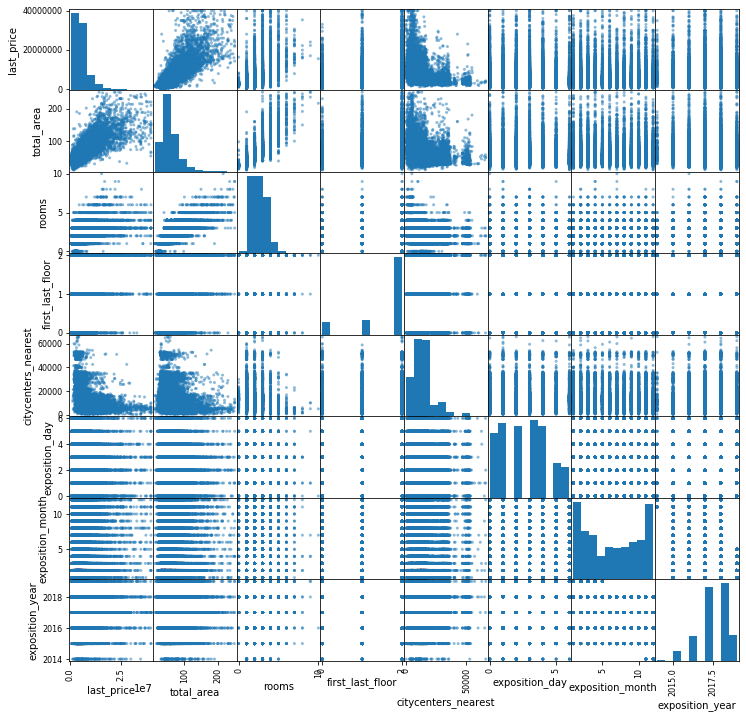

In [26]:
(
pd.plotting.scatter_matrix(data[['last_price', 'total_area', 'rooms', 'first_last_floor', 'citycenters_nearest', 'exposition_day',
      'exposition_month', 'exposition_year']], figsize=(12, 12))
)

Text(0.5, 1.0, 'first_last_floor')

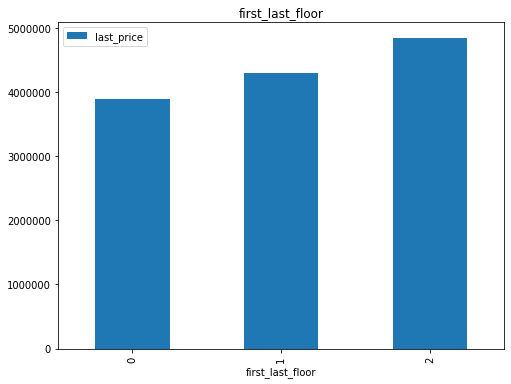

In [27]:
#explore a factor of floor (keep in mind that 0 -  first floor, 2 - last, 2 - else)
data.pivot_table(index='first_last_floor', values='last_price', aggfunc='median').plot(y='last_price', kind='bar', figsize=(8, 6))
plt.title('first_last_floor')

Text(0.5, 1.0, 'exposition_day')

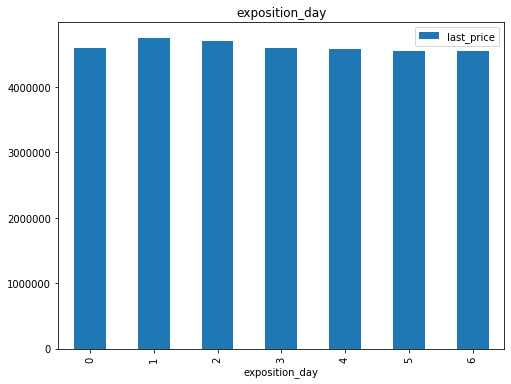

In [28]:
#explor a factor of day of exposition
data.pivot_table(index='exposition_day', values='last_price', aggfunc='median').plot(y='last_price', kind='bar', figsize=(8, 6))
plt.title('exposition_day')

Text(0.5, 1.0, 'exposition_month')

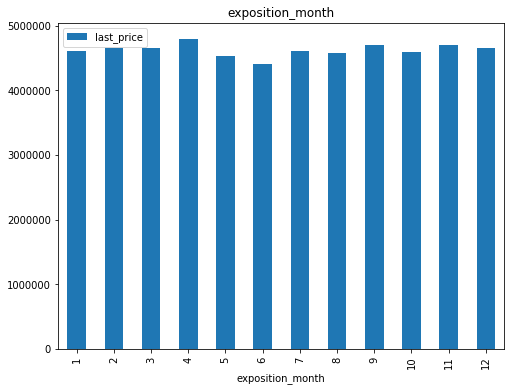

In [29]:
data.pivot_table(index='exposition_month', values='last_price', aggfunc='median').plot(y='last_price', kind='bar', figsize=(8, 6))
plt.title('exposition_month')

Text(0.5, 1.0, 'exposition_year')

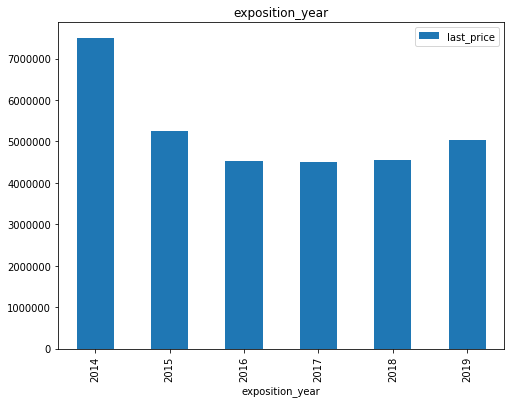

In [30]:
data.pivot_table(index='exposition_year', values='last_price', aggfunc='median').plot(y='last_price', kind='bar', figsize=(8, 6))
plt.title('exposition_year')

# Conclusion

The most important factor of price is area. It needs to be mentioned that the most of ads from city center. Price in them price is higher. Floor factor also have an influence on price. First floor flats are not so frequent and they are cheaper. Middle floor flats usually are the most favoured (it also reflects on their price). More expansive flats publishes in first half of a week. Monthly distribution looks following: raise in first quarter, then declining in May-June, and then another raise at the end of year. Tme most active year was 2014. Then falling and flat.

Average price in top ten localities 106373.0957060201
                   price_per_meter
locality_name                     
Санкт-Петербург      111864.323706
Пушкин               103211.600522
деревня Кудрово       92524.926684
посёлок Парголово     90070.533938
посёлок Мурино        85903.066372
посёлок Шушары        78658.506394
Колпино               75405.980131
Гатчина               68649.209847
Всеволожск            68604.949688
Выборг                58149.637773


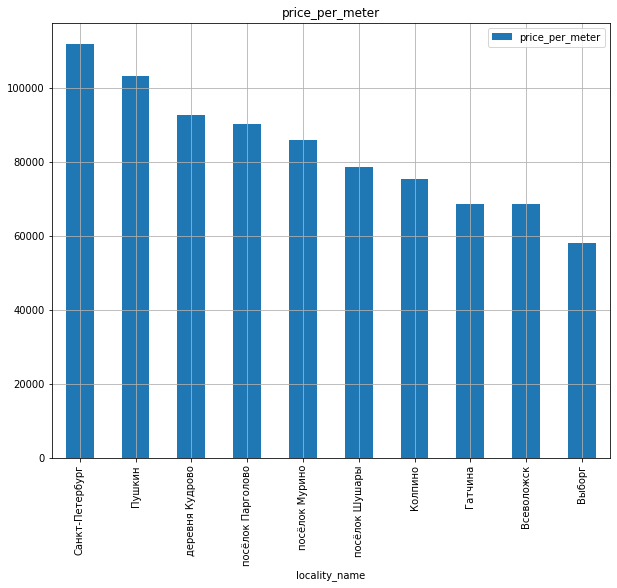

In [31]:
#select top 10 localities
big_10 = data.groupby('locality_name').count().sort_values(by='total_area', ascending=False).head(10)

#calculate average price
big_10_data = data.query('locality_name in @big_10.index')
print('Average price in top ten localities', big_10_data['price_per_meter'].mean())

#sort by an average price per meter
print(big_10_data.pivot_table(index='locality_name', values='price_per_meter', aggfunc='mean').sort_values(by= 'price_per_meter', ascending=False))

#plot average prices per meter
big_10_data.pivot_table(index='locality_name', values='price_per_meter', aggfunc='mean').sort_values(by= 'price_per_meter', ascending=False).plot(y='price_per_meter', kind='bar', title='price_per_meter', grid=True, figsize=(10, 8))



# Conclusion

The most expensive property is in St.Petersbourg, the cheapest - in Vyborg


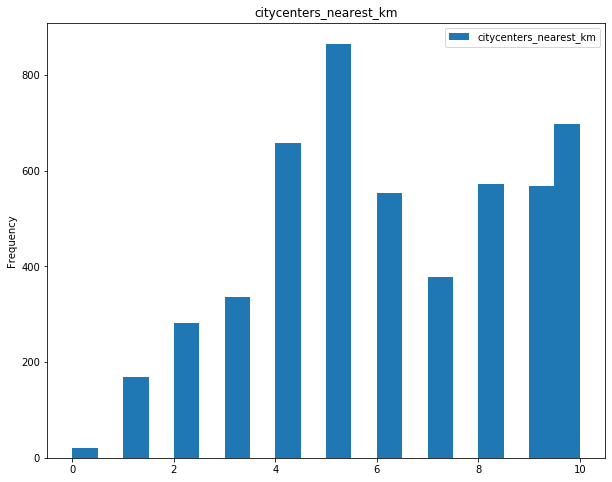

In [32]:
warnings.simplefilter('ignore')

#explore St.Petersbourg ads
spb_data = data.query('locality_name == "Санкт-Петербург"')

spb_data['citycenters_nearest_km'] = (spb_data['citycenters_nearest'] / 1000).round(decimals=0)

#find city center of St.Petersbourg via histogram
spb_data.plot(y='citycenters_nearest_km', kind='hist', bins= 20, title='citycenters_nearest_km', figsize=(10, 8), range=(0,10))


# Conclusion

Looking at the plot we can say that city center of St.Petersbourg is drawing by circle with 7 km radius.

In [33]:
#city center exploration
spb_data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,14983.000000,1.498300e+04,14983.000000,9646.000000
mean,62.445906,7.132651e+06,2.144097,2.757912
std,30.417596,4.924169e+06,1.070156,0.286405
min,13.000000,1.190000e+06,0.000000,2.000000
25%,42.000000,4.250000e+06,1.000000,2.550000
50%,55.000000,5.530000e+06,2.000000,2.700000
75%,74.000000,8.000000e+06,3.000000,2.850000
max,250.000000,4.000000e+07,10.000000,5.800000


In [34]:
#compare it with a whole market
data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,22825.000000,2.282500e+04,22825.000000,13980.000000
mean,58.678059,5.889794e+06,2.049551,2.721167
std,27.734666,4.509199e+06,1.019030,0.266174
min,13.000000,4.300000e+05,0.000000,2.000000
25%,40.000000,3.400000e+06,1.000000,2.510000
50%,52.000000,4.630000e+06,2.000000,2.650000
75%,69.000000,6.700000e+06,3.000000,2.800000
max,250.000000,4.000000e+07,10.000000,5.800000


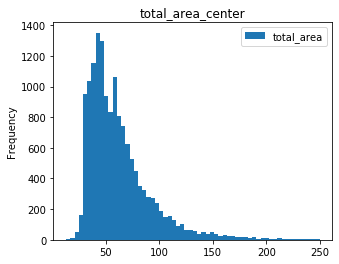

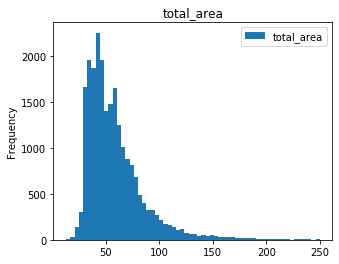

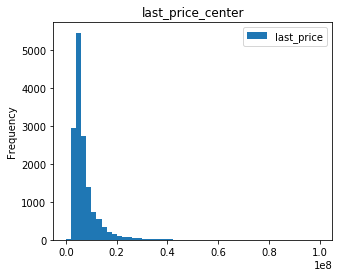

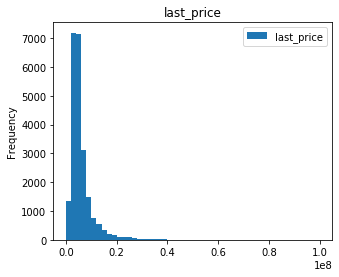

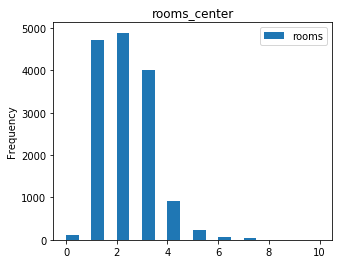

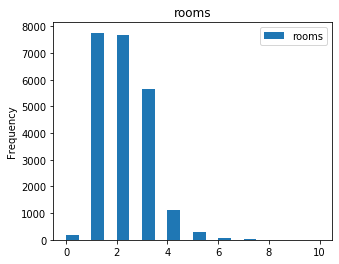

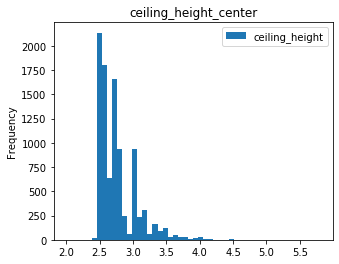

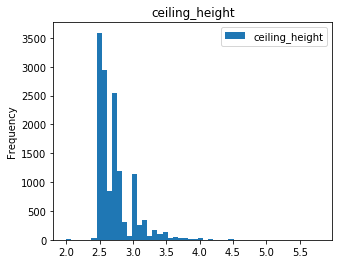

In [35]:
#plot histograms
spb_data.plot(y='total_area', kind='hist', title='total_area_center', bins=60, figsize=(5, 4))
data.plot(y='total_area', kind='hist', title='total_area', bins=60, figsize=(5, 4))

spb_data.plot(y='last_price', kind='hist', range=(0, 100000000), title='last_price_center', bins=50, figsize=(5, 4))
data.plot(y='last_price', kind='hist', range=(0, 100000000), title='last_price', bins=50, figsize=(5, 4))

spb_data.plot(y='rooms', kind='hist', title='rooms_center', bins=20, figsize=(5, 4))
data.plot(y='rooms', kind='hist', title='rooms', bins=20, figsize=(5, 4))

spb_data.plot(y='ceiling_height', kind='hist', title='ceiling_height_center', bins=50, figsize=(5, 4))
data.plot(y='ceiling_height', kind='hist', title='ceiling_height', bins=50, figsize=(5, 4))

# Conclusion

The main parameters of city center segment and of the whole market are look alike, except a price. Also a standard deviation is greater. It points to more diversity of what a city center is offering.

In [36]:
#influence of property parameters on price per 1 square meter 
(
    
spb_data[['last_price', 'total_area', 'rooms', 'first_last_floor', 'citycenters_nearest', 'exposition_day',
      'exposition_month', 'exposition_year']].corr()
)


,last_price,total_area,rooms,first_last_floor,citycenters_nearest,exposition_day,exposition_month,exposition_year
last_price,1.000000,0.807848,0.528530,0.068527,-0.412401,-0.004896,-0.002801,-0.036572
total_area,0.807848,1.000000,0.797701,0.015681,-0.347558,-0.009938,0.000731,-0.091853
rooms,0.528530,0.797701,1.000000,-0.068707,-0.276818,-0.009011,-0.009921,-0.057052
first_last_floor,0.068527,0.015681,-0.068707,1.000000,0.060267,0.007926,0.007479,0.013984
citycenters_nearest,-0.412401,-0.347558,-0.276818,0.060267,1.000000,0.001684,0.009807,0.080469
exposition_day,-0.004896,-0.009938,-0.009011,0.007926,0.001684,1.000000,0.003396,-0.003103
exposition_month,-0.002801,0.000731,-0.009921,0.007479,0.009807,0.003396,1.000000,-0.278715
exposition_year,-0.036572,-0.091853,-0.057052,0.013984,0.080469,-0.003103,-0.278715,1.000000


In [37]:
#compare to the whole market
(
data[['last_price', 'total_area', 'rooms', 'first_last_floor', 'citycenters_nearest', 'exposition_day',
      'exposition_month', 'exposition_year']].corr()
)

,last_price,total_area,rooms,first_last_floor,citycenters_nearest,exposition_day,exposition_month,exposition_year
last_price,1.000000,0.784258,0.500895,0.113998,-0.345121,-0.011595,0.004410,-0.039639
total_area,0.784258,1.000000,0.795649,0.026577,-0.236472,-0.011263,0.005954,-0.082525
rooms,0.500895,0.795649,1.000000,-0.058355,-0.171718,-0.004790,-0.005267,-0.050722
first_last_floor,0.113998,0.026577,-0.058355,1.000000,-0.066832,0.001088,0.010915,0.017247
citycenters_nearest,-0.345121,-0.236472,-0.171718,-0.066832,1.000000,0.010653,-0.009503,0.024736
exposition_day,-0.011595,-0.011263,-0.004790,0.001088,0.010653,1.000000,0.011630,-0.004038
exposition_month,0.004410,0.005954,-0.005267,0.010915,-0.009503,0.011630,1.000000,-0.271437
exposition_year,-0.039639,-0.082525,-0.050722,0.017247,0.024736,-0.004038,-0.271437,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4982f354d0>,
      dtype=object)

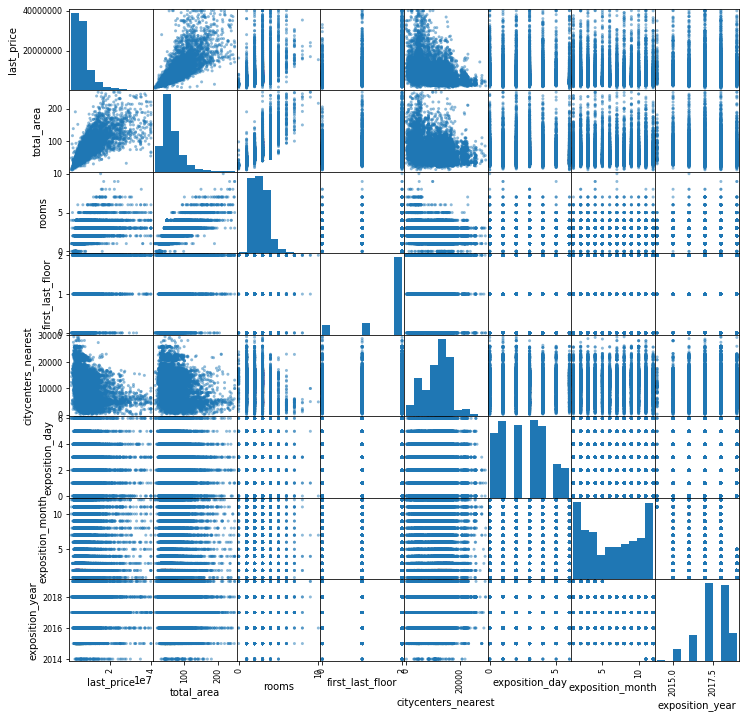

In [38]:
(
pd.plotting.scatter_matrix(spb_data[['last_price', 'total_area', 'rooms', 'first_last_floor', 'citycenters_nearest', 'exposition_day',
      'exposition_month', 'exposition_year']], figsize=(12, 12))
)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f49822636d0>,
      dtype=object)

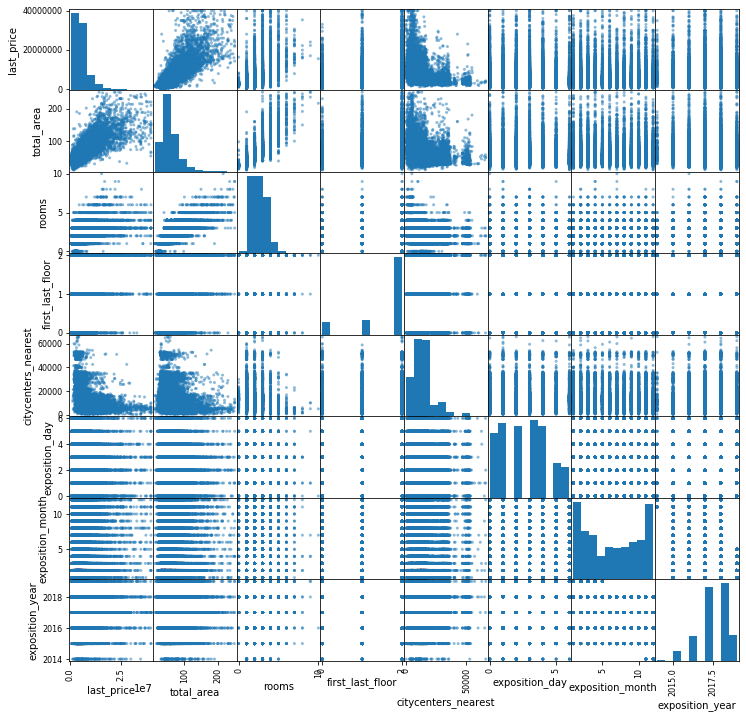

In [39]:

(
pd.plotting.scatter_matrix(data[['last_price', 'total_area', 'rooms', 'first_last_floor', 'citycenters_nearest', 'exposition_day',
      'exposition_month', 'exposition_year']], figsize=(12, 12))
)

# Conclusion

Dependences of property's price on main parameters in city center and other locations look alike.

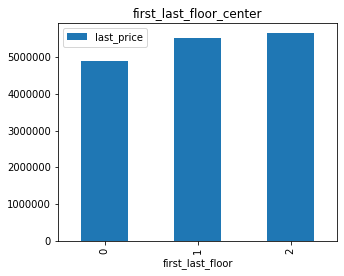

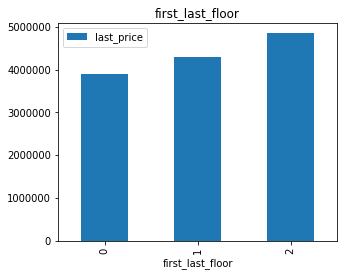

In [40]:
#explore a factor of floor (keep in mind that 0 -  first floor, 2 - last, 2 - else)
spb_data.pivot_table(index='first_last_floor', values='last_price', aggfunc='median').plot(y='last_price', kind='bar', title='first_last_floor_center', figsize=(5, 4))
data.pivot_table(index='first_last_floor', values='last_price', aggfunc='median').plot(y='last_price', kind='bar', title='first_last_floor', figsize=(5, 4))

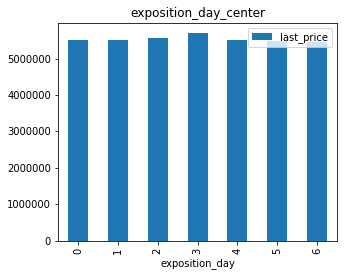

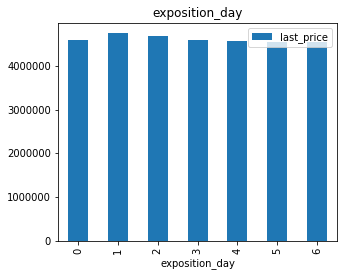

In [41]:
# an exposition day infuence
spb_data.pivot_table(index='exposition_day', values='last_price', aggfunc='median').plot(y='last_price', kind='bar', title='exposition_day_center', figsize=(5, 4))
data.pivot_table(index='exposition_day', values='last_price', aggfunc='median').plot(y='last_price', kind='bar', title='exposition_day', figsize=(5, 4))

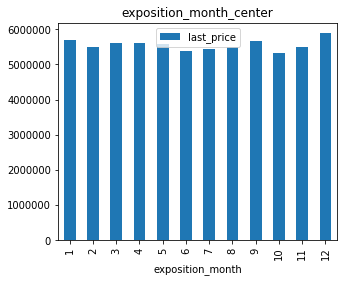

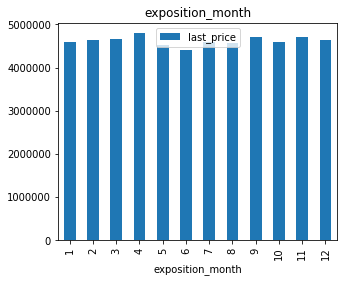

In [42]:
spb_data.pivot_table(index='exposition_month', values='last_price', aggfunc='median').plot(y='last_price', kind='bar', title='exposition_month_center', figsize=(5, 4))
data.pivot_table(index='exposition_month', values='last_price', aggfunc='median').plot(y='last_price', kind='bar', title='exposition_month', figsize=(5, 4))

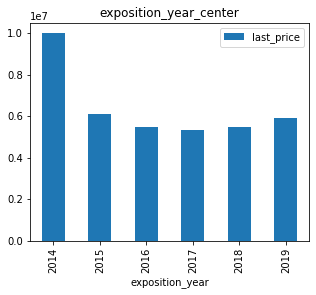

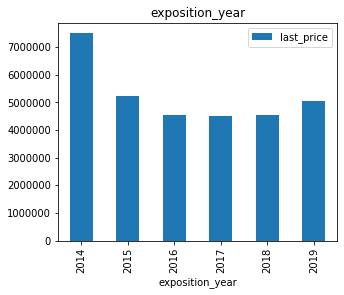

In [43]:
spb_data.pivot_table(index='exposition_year', values='last_price', aggfunc='median').plot(y='last_price', kind='bar', title='exposition_year_center', figsize=(5, 4))
data.pivot_table(index='exposition_year', values='last_price', aggfunc='median').plot(y='last_price', kind='bar', title='exposition_year', figsize=(5, 4))

# Conclusion

Unlike the whole market last floor at the city center is almost not decreasing price. Apparently lofts near Nevski prospect value highly.  



## General Conclusion

Main factors that influent on price of real estate are an area and distance from the city center. For center of St. Petersburg their importance are slightly different, but almost the same. 